In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the dataset and Extracting the Independent and Dependent variables
companies = pd.read_csv(r'C:\Users\Personal\Documents\personal\Projects\Linear regression\Companies\1000_Companies.csv')
companies.head(40)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


<Axes: >

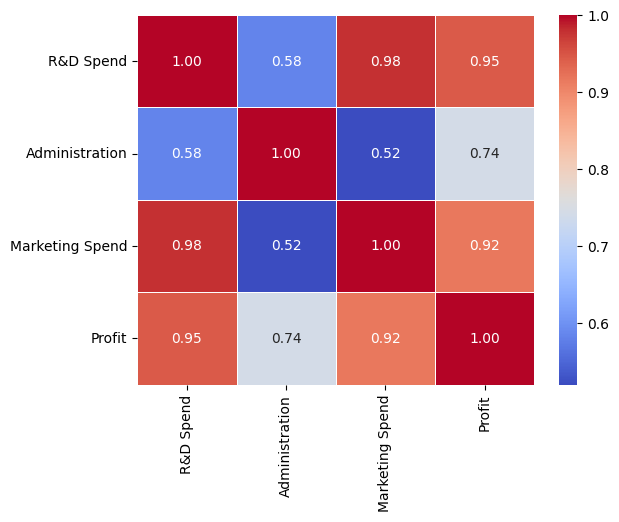

In [3]:
# Data Visualisation
# Building the Correlation matrix
numeric_columns = companies.select_dtypes(include=['number'])
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [4]:
X = companies.iloc[:, :-1]    # independent varible
y = companies.iloc[:, -1]     # dependent variable


In [6]:
# Convert 'State' column to one hot encoding
X = pd.get_dummies(X, columns=['State'], drop_first=True)

print(X.head())

   R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
0  165349.20       136897.80        471784.10          False            True
1  162597.70       151377.59        443898.53          False           False
2  153441.51       101145.55        407934.54           True           False
3  144372.41       118671.85        383199.62          False            True
4  142107.34        91391.77        366168.42           True           False


In [7]:
# Convert boolean columns to integers (1 and 0)
X[['State_Florida', 'State_New York']] = X[['State_Florida', 'State_New York']].astype(int)


print(X.head())

   R&D Spend  Administration  Marketing Spend  State_Florida  State_New York
0  165349.20       136897.80        471784.10              0               1
1  162597.70       151377.59        443898.53              0               0
2  153441.51       101145.55        407934.54              1               0
3  144372.41       118671.85        383199.62              0               1
4  142107.34        91391.77        366168.42              1               0


In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)  

In [10]:
# Linear regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)
print(y_pred)

[ 89790.61532916  88427.07187361  94894.67836972 175680.8672561
  83411.73042089 110571.90200074 132145.2293644   91473.37719687
 164597.05380606  53222.82667401  66950.1905099  150566.43987004
 126915.20858596  59337.85971051 177513.91053061  75316.28143051
 118248.14406603 164574.40699901 170937.28981069 182069.11645084
 118845.03252689  85669.95112229 180992.59396143  84145.08220145
 105005.83769214 101233.56772747  53831.07669092  56881.41475225
  68896.39346905 210040.00765883 120778.72270894 111724.87157654
 101487.90541518 137959.02649623  63969.95996744 108857.91214126
 186014.72531987 171442.64130747 174644.26529204 117671.49128195
  96731.37857434 165452.25779409 107724.34331255  50194.54176914
 116513.89532178  58632.48986821 158416.46827609  78541.4852161
 159727.66671743 131137.87699644 184880.70924515 174609.08266879
  93745.66352059  78341.13383418 180745.90439079  84461.61490552
 142900.90602902 170618.44098396  84365.09530839 105307.3716218
 141660.07290786  52527.3434

In [12]:
result_lm = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
result_lm['Difference'] = y_test - y_pred
result_lm.head()

,Actual,Predicted,Difference
993,89012.02672,89790.615329,-778.588609
859,87654.55773,88427.071874,-772.514144
298,94093.35179,94894.678370,-801.326580
553,175396.26160,175680.867256,-284.605656
672,83356.61784,83411.730421,-55.112581


In [18]:
print('Estimated intercept is', regressor.intercept_)

Estimated intercept is -2.1827872842550278e-10


In [14]:
print('Coefficient of the model is', regressor.coef_)

Coefficient of the model is [ 5.25845857e-01  8.44390881e-01  1.07574255e-01 -8.80536598e+02
 -6.98169073e+02]


In [18]:
coef = zip(X.columns, regressor.coef_)
coef_df = pd.DataFrame(list(zip(X.columns, regressor.coef_)), columns=['Features', 'Coefficients'])
coef_df

,Features,Coefficients
0,R&D Spend,0.525846
1,Administration,0.844391
2,Marketing Spend,0.107574
3,State_Florida,-880.536598
4,State_New York,-698.169073


In [ ]:
Scatterplot


In [13]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.9112695892268795